In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

# Unsupervised learning

Unsupervised learning is a category of machine learning where the algorithm is trained on a dataset without explicit supervision or labeled output. In unsupervised learning, the goal is to discover patterns, structures, or relationships within the data without being told what to look for. It involves finding hidden insights or representations in the data, which can be valuable for tasks like data exploration, data preprocessing, and generating meaningful insights.

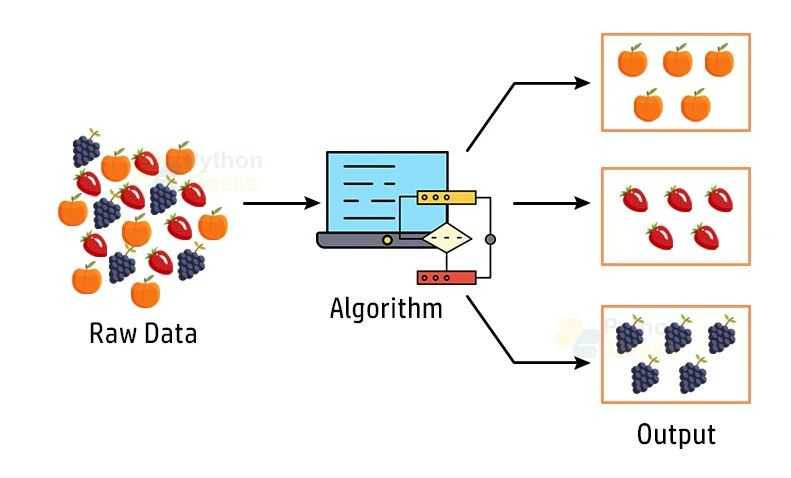

In [3]:
from PIL import Image
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/9. Unsupervised/1_Unsupervised.JPG')


The main types of unsupervised learning tasks include:

* **Clustering:** Grouping similar data points together into clusters or categories based on their inherent similarities or patterns.

* **Dimensionality Reduction:** Reducing the number of features or variables in a dataset while retaining as much relevant information as possible.

This notebook focuses on clustering algorithms. We will now walk through three clustering algorithms, first discussing them at a high-level, then showing how to implement them with Python libraries.
With that aim, and for the sake of comparison, we will employ two datasets with two types of clusters:
- spherical
- arbitrary

Before getting into details we will load and scale the dataset that we will employ.


## Data load



### Data set 1: blobs

`Sklearn` has some wonderful methods for [generative synthetic datasets](https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html). They can be quite useful for testing clustering for classification purposes. Here we will use `make_blobs` to create spherical, similarly-sized clusters. `make_blobs` generates features on comparable scales. The clusters are normally distributed with similar variances and no feature dominates the distance metric. Therefore, **there is no need to standardise**.

,x,y
0,9.200227,0.554154
1,-8.182836,-0.264487
2,9.594972,1.993835
3,-8.072387,-0.824714
4,-5.174429,7.043891


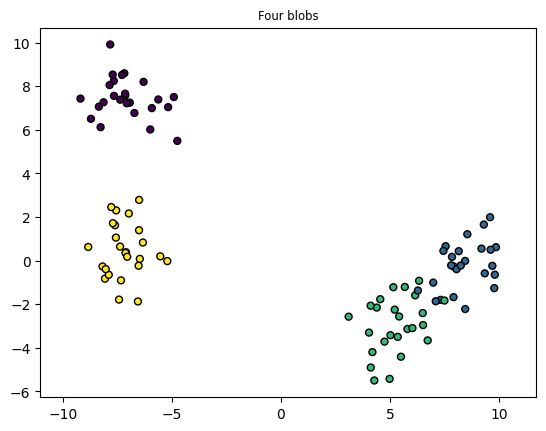

In [53]:
plt.title("Four blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=4, random_state=114) # centres is number of classes
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');
blob_df = pd.DataFrame(X1, columns=["x", "y"])
plt.axis('equal');
blob_df.head()

### Data set 2: groups of points with arbitrary shapes

Now we load a dataset whose groups of points have arbitrary shapes.

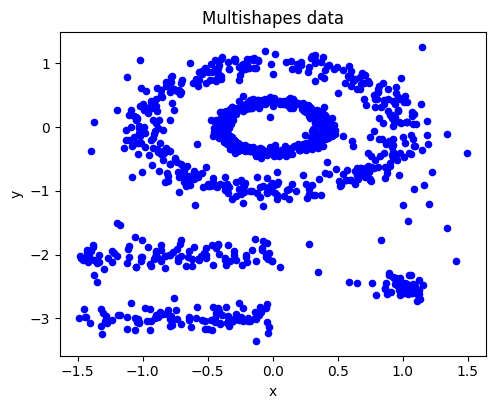

,x,y
0,-0.803739,-0.853053
1,0.852851,0.367618
2,0.927180,-0.274902
3,-0.752626,-0.511565
4,0.706846,0.810679


In [11]:
multishapes = pd.read_csv("/content/drive/MyDrive/Class 25-26/data/multishapes.csv")
ms_df = multishapes[['x','y']]
ms_df.plot.scatter(x='x',y='y',c='Blue',\
                            title="Multishapes data",\
                            figsize=(5.5,4.2))
plt.show()
ms_df.head()

In [12]:
# displays our summary statistics of our data
ms_df.describe()

,x,y
count,1100.000000,1100.000000
mean,-0.081222,-0.625431
std,0.644967,1.176170
min,-1.489180,-3.353462
25%,-0.478839,-1.126752
50%,-0.132920,-0.297040
75%,0.366072,0.250817
max,1.492208,1.253874


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(ms_df)
print(scaler.mean_)
scaled_df = scaler.transform(ms_df)

###### if I had a test set I would transform here:
# test_scaled_df = scaler.transform(test_df)
##################################################

scaled_df = pd.DataFrame(scaled_df, \
                         index=multishapes['shape'], columns = ms_df.columns)
scaled_df.describe()

[-0.08122171 -0.6254313 ]


,x,y
count,1.100000e+03,1100.000000
mean,4.521636e-17,0.000000
std,1.000455e+00,1.000455
min,-2.183985e+00,-2.320473
25%,-6.167723e-01,-0.426425
50%,-8.019252e-02,0.279331
75%,6.938298e-01,0.745340
max,2.440659e+00,1.598544


#### Very important reminder!!

Recall that if you have a training and a test set, always `.fit()` your scaler only to the training set, and then`.transform()` both sets.  

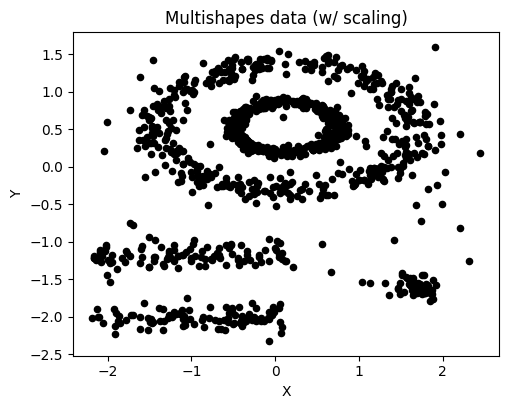

In [14]:
# plots our data
msplot = scaled_df.plot.scatter(x='x',y='y',c='Black',\
                                title="Multishapes data (w/ scaling)",\
                                figsize=(5.5,4.2))
msplot.set_xlabel("X")
msplot.set_ylabel("Y")
plt.show()

# Clustering algorithms

Clustering is a type of unsupervised learning technique that groups similar data points together based on their inherent characteristics or features. Unlike supervised learning, where the algorithm learns from labelled data, in unsupervised learning, the algorithm discovers patterns and structures in unlabeled data.

The primary role of clustering in unsupervised learning is to find natural groupings or clusters within the data. These clusters represent similarities or relationships among data points, making it easier to understand and analyse complex datasets. Clustering has various applications, including customer segmentation, image segmentation, anomaly detection, and more.

## 1. k-Means clustering (Centroid-based Clustering)

K-means is a centroid-based clustering algorithm that divides data into K clusters, where K is a predefined number. It works by iteratively assigning data points to the nearest cluster centroid and then updating the centroids based on the mean of the points in each cluster.

#### How it works

Let's start with the blobs dataset.

In [54]:
from sklearn.cluster import KMeans
blob_kmeans = KMeans(n_clusters=4, init='random',\
                   n_init=3, random_state=109).fit(blob_df) # run the algorithm n_init=3 times, each with different random initial cluster positions
                                                       # it computes the inertia for each result and keep the run with the lowest inertia (best clustering)

That's it! Just 1 line of code!

Now that we've run k-Means, we can look at various attributes of our clusters. Full documenation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [55]:
display(blob_kmeans.cluster_centers_)
display(blob_kmeans.labels_[0:10])

array([[-7.17304478,  0.47579937],
       [ 5.28466309, -2.88867974],
       [ 8.51966656, -0.17052013],
       [-7.07838171,  7.454463  ]])

array([2, 0, 2, 0, 3, 0, 2, 0, 1, 0], dtype=int32)

Now we will do the clustering for the multishapes dataset.

In [16]:
ms_kmeans = KMeans(n_clusters=2, init='random', n_init=3, random_state=109).fit(scaled_df)

In [ ]:
display(ms_kmeans.cluster_centers_)
display(ms_kmeans.labels_[0:10])

array([[ 0.42239787,  0.40726094],
       [-1.02507148, -0.98833731]])

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int32)

### Plotting
Take note of matplotlib's `c=` argument to color items in the plot, along with our stacking two different plotting functions in the same plot.

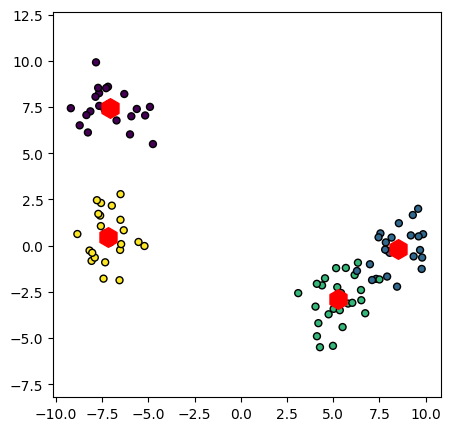

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');
plt.scatter(blob_kmeans.cluster_centers_[:,0],\
            blob_kmeans.cluster_centers_[:,1], c='r', marker='h', s=200);
plt.axis('equal');

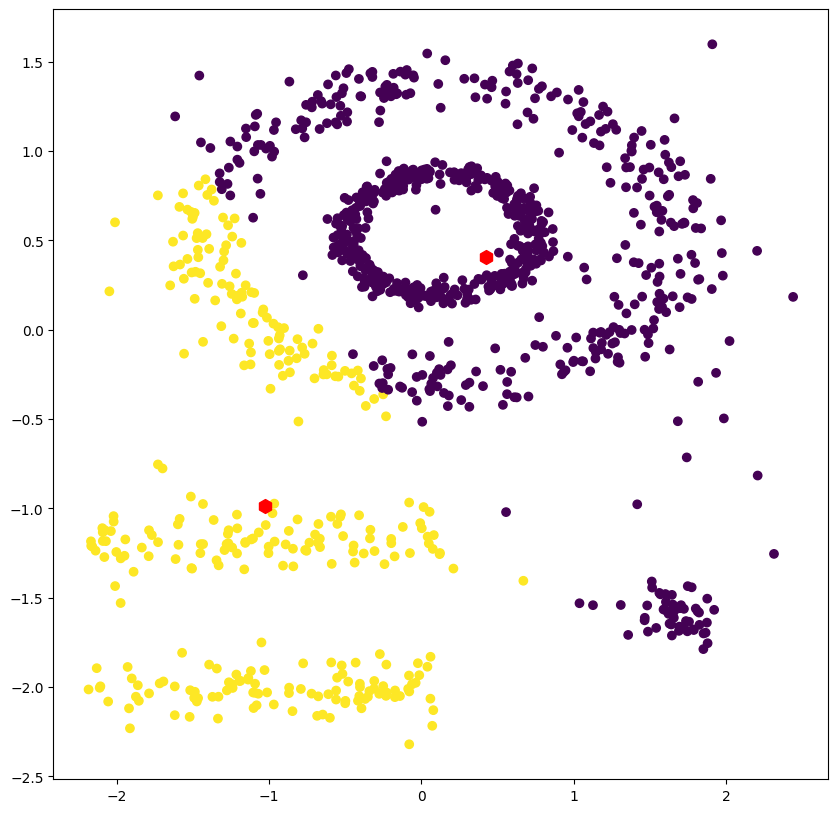

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(scaled_df['x'],scaled_df['y'], c=ms_kmeans.labels_);
plt.scatter(ms_kmeans.cluster_centers_[:,0],ms_kmeans.cluster_centers_[:,1], c='r', marker='h', s=100);

<div class="exercise"><b>Question</b>: Is this expected or did anything go wrong? </div>

### Observations:
 - Initialisations matter; run multiple times
 - k-Means can struggle with clusters that are close together; they can get lumped into one
 - There's no notion of 'not part of any cluster' or 'part of two clusters'.

# How to select the optimal number of clusters


## Quality of Clusters: Inertia
Inertia measures the total squared distance from points to their cluster's centroid. We obviously want this distance to be relatively small. If we increase the number of clusters, it will naturally make the average distance smaller. If every point has its own cluster, then our distance would be 0. That's obviously not an ideal way to cluster. One way to determine a reasonable number of clusters to simply try many different clusterings as we vary **k**, and each time, measure the overall inertia.

Let's start analysing the blobs dataset.

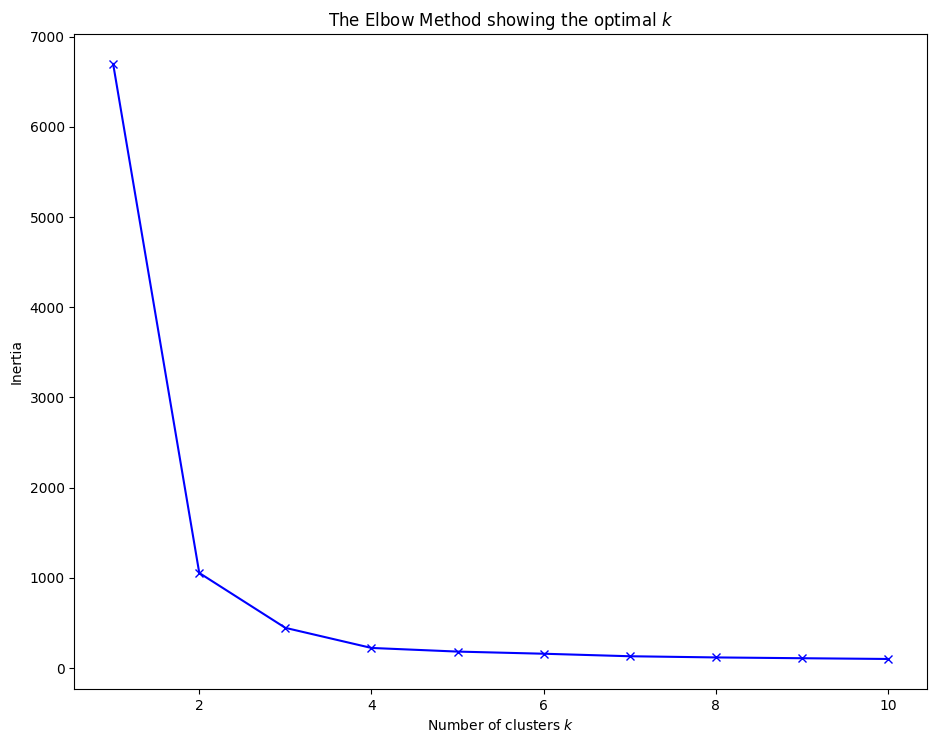

In [57]:
wss = []
for i in range(1,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(blob_df)
    wss.append(fitx.inertia_)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

Look for the place(s) where distance stops decreasing (i.e., the 'elbow' of the curve). It seems that 3 or 4 would be a good number of clusters, as a higher *k* yields diminishing returns. Notice that 3 seems a better choice.

Now, let's analyse the multishapes dataset.

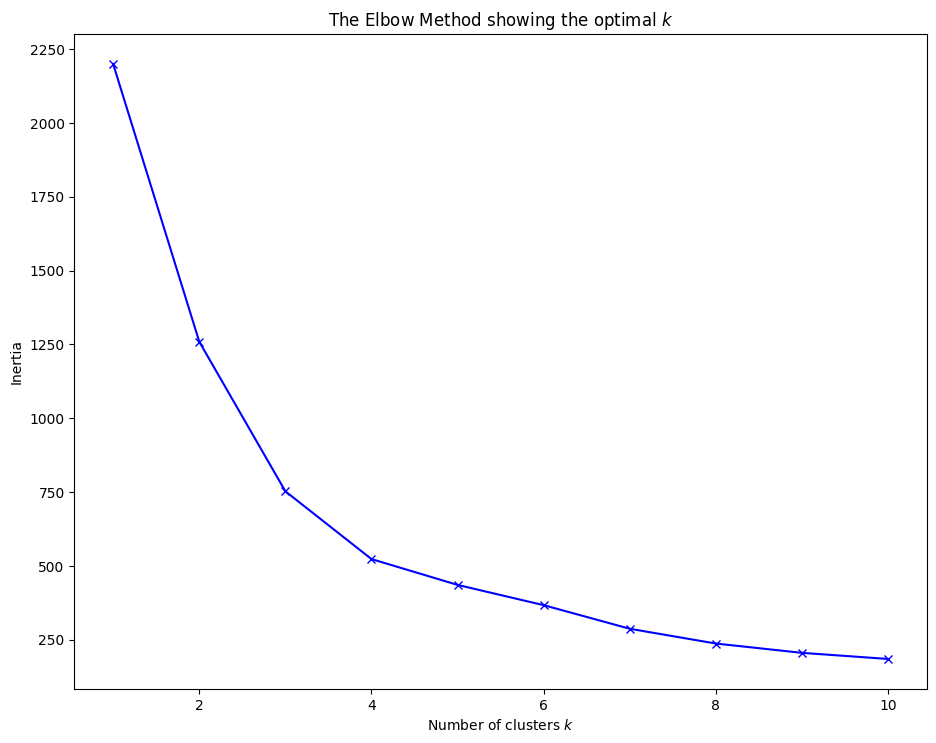

In [ ]:
wss = []
for i in range(1,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(scaled_df)
    wss.append(fitx.inertia_)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

Look for the place(s) where distance stops decreasing as much (i.e., the 'elbow' of the curve). It seems that 4 would be a good number of clusters, as a higher *k* yields diminishing returns.

Compare with the elbow method above. For the blobs dataset, the elbow appears quite clearly, but this is not the case for this dataset. This is why the elbow method is worth a try, but you shouldn't have high expectations.

<div class="exercise"><b>Exercise</b>: Run K-means again with 4 clusters this time. </div>

## Quality of Clusters: Silhouette

Let's say we have a data point $i$, and the cluster it belongs to is referred to as $C(i)$. One way to measure the quality of a cluster $C(i)$ is to measure how close its data points are to each other (within-cluster) compared to nearby, other clusters $C(j)$. This is what `Silhouette Scores` provide for us. The range is [-1,1]; 0 indicates a point on the decision boundary (equal average closeness to points intra-cluster and out-of-cluster), and negative values mean that datum might be better in a different cluster.

Specifically, let $a(i)$ denote the average distance data point $i$ is to the other points in the same cluster:

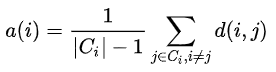

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/9. Unsupervised/silhouette_intra.png')

Similarly, we can also compute the average distance that data point $i$ is to all **other** clusters. The cluster that yields the minimum distance is denoted by $b(i)$:  

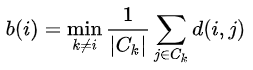

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/9. Unsupervised/silhouette_outer.png')

Hopefully our data point $i$ is much closer, on average, to points within its own cluster (i.e., $a(i)$ than it is to its closest neighboring cluster $b(i)$). The silhouette score quantifies this as $s(i)$:


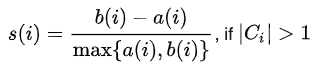

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/9. Unsupervised/silhouette_eq.png')

**NOTE:** If data point $i$ belongs to its own cluster (no other points), then the silhouette score is set to 0 (otherwise, $a(i)$ would be undefined).

The silhouette score plotted below is the **overall average** across all points in our dataset.

The `silhouette_score()` function is available in `sklearn`. We can manually loop over values of K (for applying k-Means algorithm), then plot its silhouette score.

Again, let's compute silhouette scores for our two datasets.

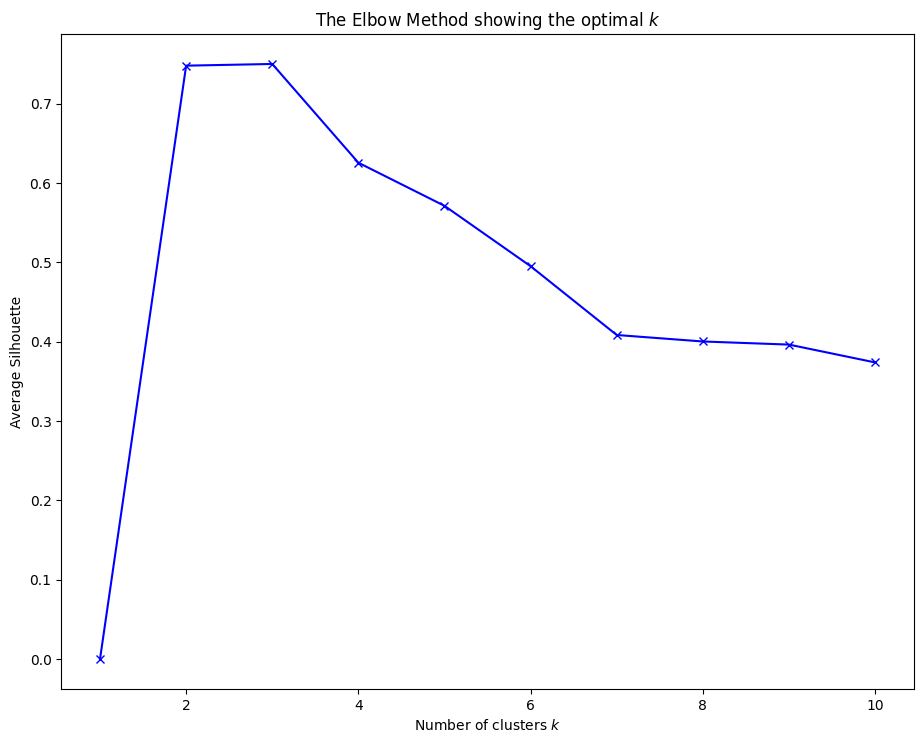

In [58]:
from sklearn.metrics import silhouette_score

scores = [0]
for i in range(2,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(X1)
    score = silhouette_score(blob_df, fitx.labels_)
    scores.append(score)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

This graph confirms that $k=3$ is a better choice than $k=4$ because the average silhouette score is larger.

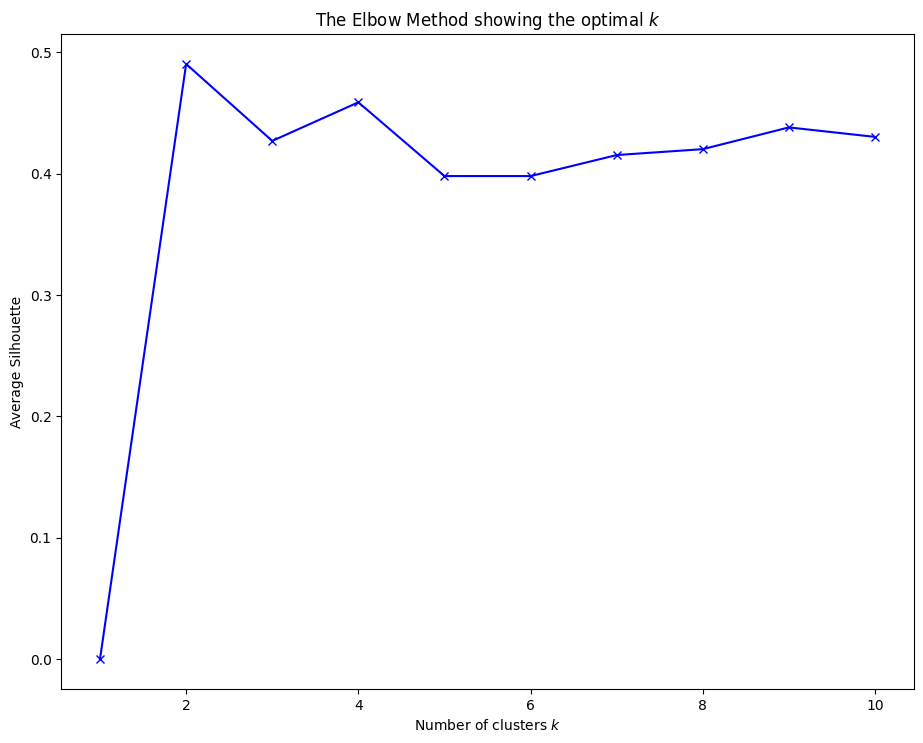

In [ ]:
from sklearn.metrics import silhouette_score

scores = [0]
for i in range(2,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(scaled_df)
    score = silhouette_score(scaled_df, fitx.labels_)
    scores.append(score)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

### Visualising all Silhouette scores for a particular clustering

Below, we borrow from an `sklearn` example. The second plot may be overkill.
 - The second plot is just the scaled data. It is *not* a PCA plot
 - If you only need the raw silhouette scores, use the `silhouette_samples()` function

In [59]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
#modified code from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def silplot(X, clusterer, pointlabels=None):
    cluster_labels = clusterer.labels_
    n_clusters = clusterer.n_clusters

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(11,8.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          ", the average silhouette_score is ", silhouette_avg,".",sep="")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(0,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    xs = X[:, 0]
    ys = X[:, 1]

    if pointlabels is not None:
        for i in range(len(xs)):
            plt.text(xs[i],ys[i],pointlabels[i])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % int(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualisation of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

For n_clusters = 3, the average silhouette_score is 0.750019255648761.


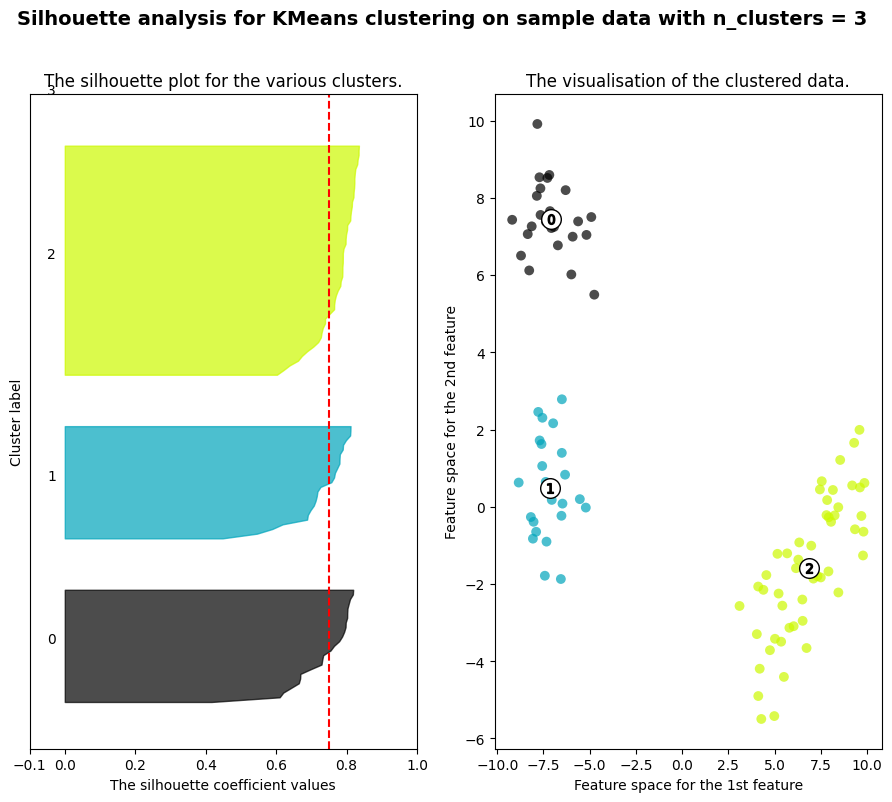

In [65]:
# run k-means with 3 clusters
blob_kmeans = KMeans(n_clusters=3, init='random', n_init=3, random_state=109).fit(blob_df)

# plot a fancy silhouette plot
silplot(blob_df.values, blob_kmeans)

For n_clusters = 2, the average silhouette_score is 0.42909047958380464.


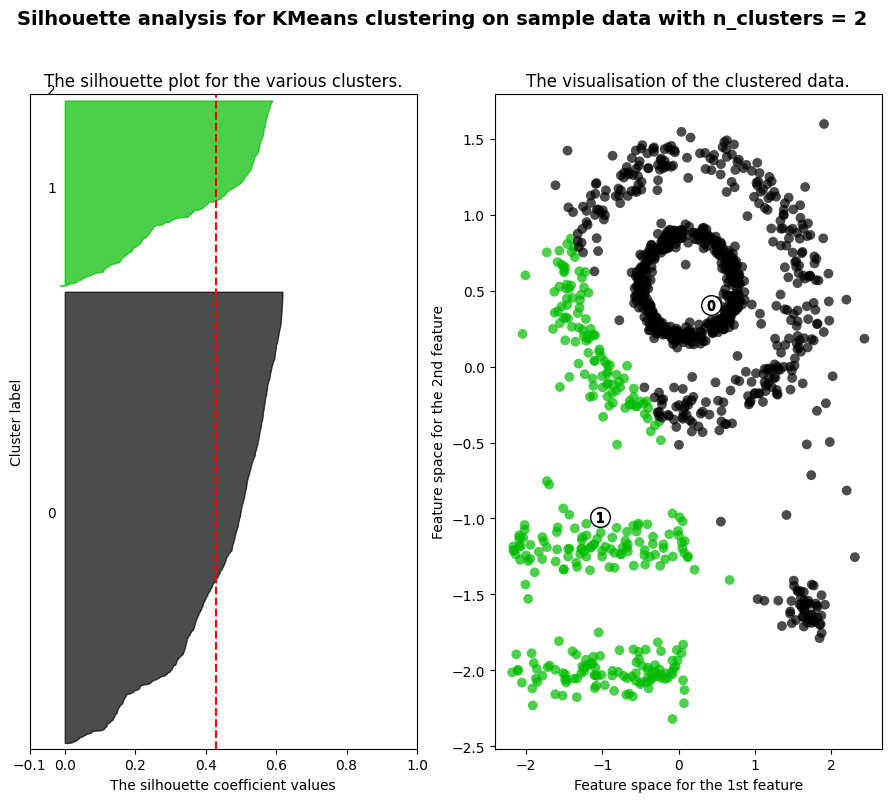

In [26]:
# run k-means with 3 clusters
ms_kmeans = KMeans(n_clusters=2, init='random', n_init=3, random_state=109).fit(scaled_df)

# plot a fancy silhouette plot
silplot(scaled_df.values, ms_kmeans)

## 2. Hierarchical agglomerative clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organised in a hierarchy. There are two types of hierarchical clustering: divisive and agglomerative.

Hierarchical clustering builds a hierarchy of clusters. It does not require specifying the number of clusters in advance. It can be either agglomerative, where data points start as individual clusters and merge into larger clusters, or divisive, where all data points initially belong to one cluster and are recursively split into smaller clusters.

Here we will focus on hierarchical agglomerative clustering.

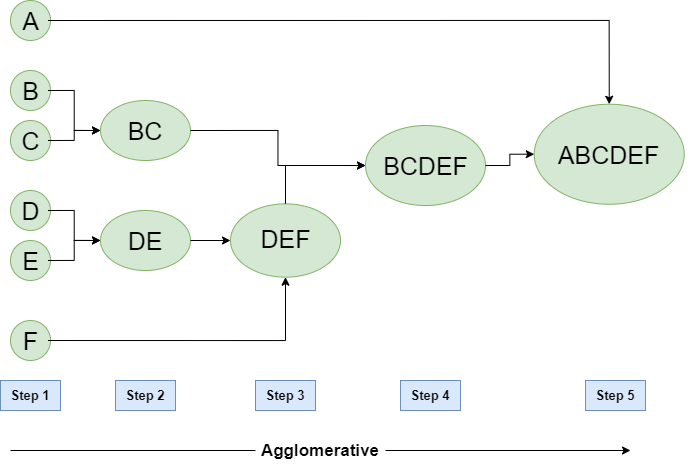

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/9. Unsupervised/2-hierachcaal.png')



#### How does it work

The agglomerative method, also known as bottom-up clustering or merging method, starts with each data point as its own cluster and iteratively combines or merges clusters until a single cluster containing all data points is formed. Here's a step-by-step explanation of how the agglomerative method works:

1. Initialization: Each data point is treated as a single cluster. So, at the beginning, you have as many clusters as there are data points.

2. Merge Step: In each iteration, the two closest clusters are combined into a single cluster. The notion of "closest" can be defined using various distance metrics, such as Euclidean distance, Manhattan distance, or others, depending on the application. Common linkage criteria used to determine cluster proximity include single linkage, complete linkage, and average linkage.

3. Repeat: Steps 2 are repeated iteratively until all data points belong to a single cluster or until a stopping criterion is met (e.g., a predetermined number of clusters or a threshold distance value).

4. Hierarchical Tree (Dendrogram): As clusters are merged, a hierarchical tree-like structure called a dendrogram is built. This dendrogram visually represents the process of merging clusters at different levels of granularity. It shows the order in which clusters were merged and at what distance they were merged.

5. Cluster Assignments: At any desired level of the dendrogram, you can cut it to obtain a specific number of clusters. The resulting clusters represent the final grouping of data points.

#### How distance is calculated between clusters:

##### Single Linkage
The distance measurement between two clusters is determined by finding the shortest distance between any two data points, one from each of the two clusters being compared. To illustrate this concept, consider clusters "r" and "s" on the left side, where their cluster-to-cluster distance is equivalent to the length of the arrow connecting their closest pair of data points.

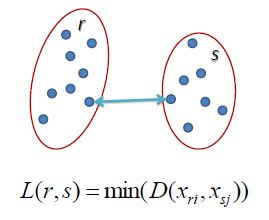

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/9. Unsupervised/3_distance1.JPG')

##### Complete  Linkage
Within complete linkage hierarchical clustering, the measurement of distance between two clusters is established by identifying the longest distance between any two data points, one from each of the two clusters being compared. For instance, when examining clusters "r" and "s" on the left side, their cluster-to-cluster distance is determined by the length of the arrow connecting their two most distant data points.

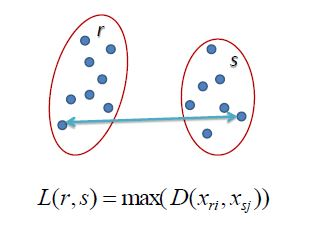

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/9. Unsupervised/4_distance2.JPG')

##### Average   Linkage
Distance measurement between two clusters is established by calculating the average distance from each point in one cluster to every point in the other cluster. To illustrate this concept, consider the clusters "r" and "s" on the left side, where their cluster-to-cluster distance is computed as the average length of the arrows connecting the points of one cluster to the other.



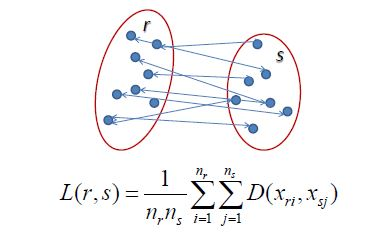

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/9. Unsupervised/5_distance3.JPG')

##### Ward Linkage

Ward’s method is a type of linkage — specifically, a linkage criterion that merges clusters by minimising the increase in within-cluster variance. It replaces distance-based linkages (single, complete, average) with a variance-based linkage.

The two clusters to merge are those that produce the smallest increase in total **within-cluster sum of squares (WCSS)**.
Mathematically, the increase in WCSS for two clusters $C_i$ and $C_j$ is:

$$
\Delta(C_i, C_j) = \text{increase in WCSS if } C_i \text{ and } C_j \text{ are merged}
$$

WCSS (**Within-Cluster Sum of Squares**) does not consider *all pairs* of points. It only considers the distance of **each point to its own cluster centroid**.

Formally, for one cluster \( C \):

$$
\text{WCSS}(C) = \sum_{x \in C} \|x - \mu_C\|^2
$$

where $ \mu_C $ is the cluster centroid. Ward only works with the Euclidean distance.


Ward is therefore **variance-based**, not purely distance-based.


### Implementing hierarchical agglomerative clustering with sklearn

`sklearn` implements the four  linkage criteria in `AgglomerativeClustering`: Ward, complete, average, single.

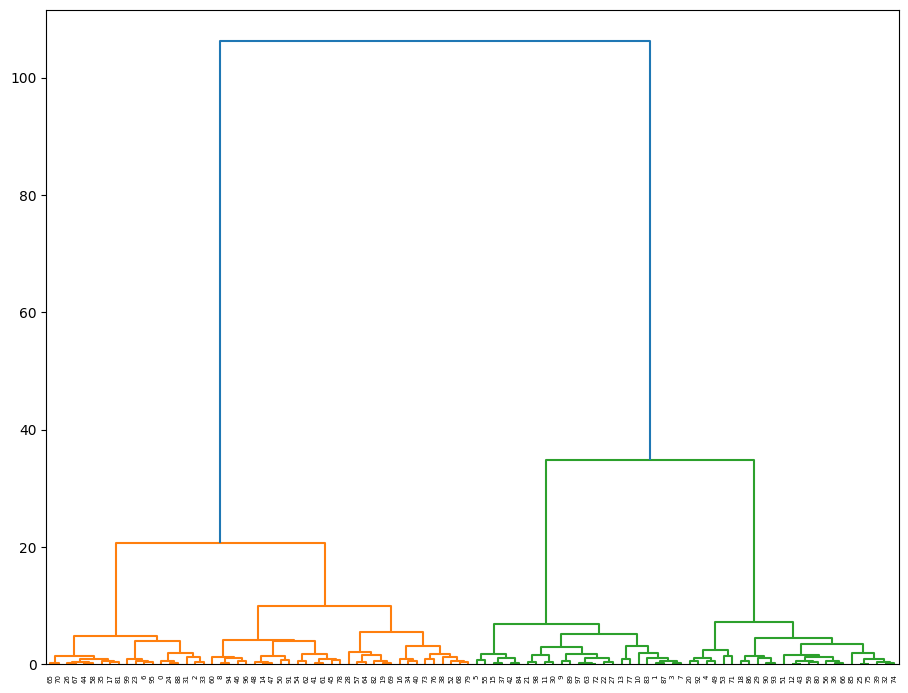

In [66]:
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist

plt.figure(figsize=(11,8.5))
dist_mat = pdist(blob_df, metric="euclidean")
ward_data = hac.ward(dist_mat)
hac.dendrogram(ward_data);

Again, here we observe that, for the blobs dataset, it is better to avoid the merging of the two large clusters into a single cluster because it causes the largest jump in distance. For that reason, we should set the distance threshold to avoid that jump in distance. This means that we would end up with 3 clusters. If we keep lowering the distance threshold, we would end up with with 4 clusters, but the gain in distance is not that significant.

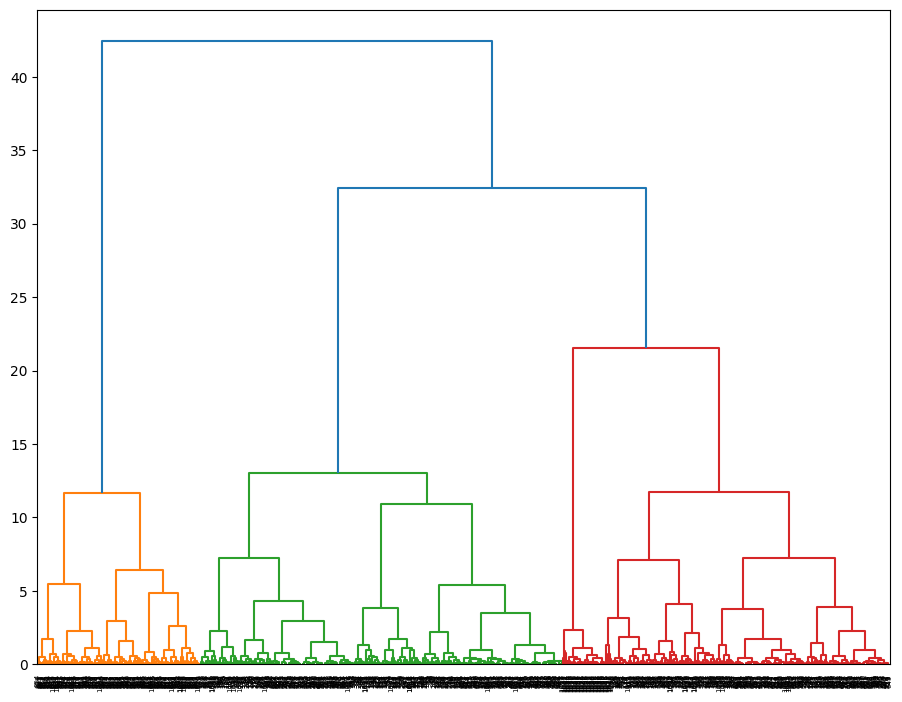

In [32]:
plt.figure(figsize=(11,8.5))
dist_mat = pdist(scaled_df, metric="euclidean")
ward_data = hac.ward(dist_mat)
hac.dendrogram(ward_data);

### Observations:
 - It is computationally expensive
 - Many choices for linkage criteria
 - Every node gets clustered (no child left behind)

In [ ]:
labellings = hac.fcluster(ward_data, t=25, criterion='distance')
silhouette_score(scaled_df, labellings)

0.4182759392486782

## 3. Density-based clustering: DBSCAN Clustering
DBSCAN employs an intuitive notion of density to define clusters, rather than defining clusters by a central point, as in k-means.

DBSCAN is implemented in scikit-learn, but there are not great automated tools for searching the optimal `epsilon` parameter. For full documentation, please [visit this page](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [67]:
from sklearn.cluster import DBSCAN
for eps in [0.2, 0.3, 0.5, 0.8]:
    labels = DBSCAN(eps=eps, min_samples=5).fit_predict(blob_df)
    unique_labels = {int(l) for l in labels}
    print("Epsilon= ", eps, "; unique labels:", unique_labels)

Epsilon=  0.2 ; unique labels: {-1}
Epsilon=  0.3 ; unique labels: {-1}
Epsilon=  0.5 ; unique labels: {0, 1, -1}
Epsilon=  0.8 ; unique labels: {0, 1, 2, 3, 4, 5, 6, -1}


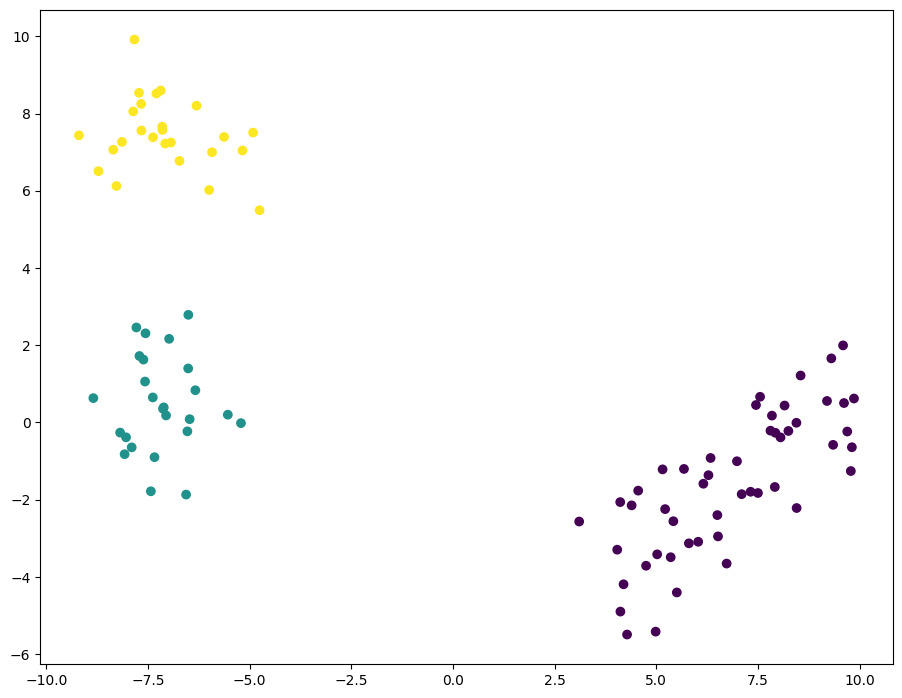

In [68]:
plt.figure(figsize=(11,8.5))
fitted_dbscan = DBSCAN(eps=2, min_samples=5).fit(blob_df)
plt.scatter(blob_df['x'],blob_df['y'], c=fitted_dbscan.labels_);

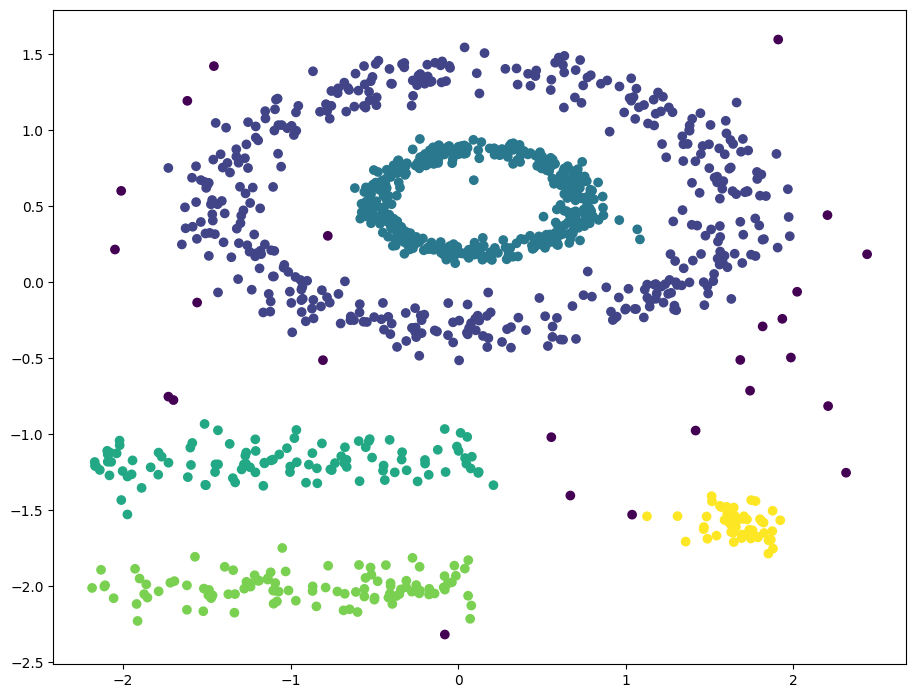

In [34]:
from sklearn.cluster import DBSCAN
plt.figure(figsize=(11,8.5))
fitted_dbscan = DBSCAN(eps=0.2).fit(scaled_df)
plt.scatter(scaled_df['x'],scaled_df['y'], c=fitted_dbscan.labels_);

**Note:** the dark purple dots are not clustered with anything else. They are lone singletons. You can validate such by setting epsilon to a very small value, and increase the min_samples to a high value. Under these conditions, nothing would cluster, and yet all dots become dark purple.

<br>

<div class="exercise"><b>Exercise</b>: Experiment with the above code by changing its epsilon value and the min_samples value (what is the default value for it, since the above code does not specify a value?)</div>

### Observations:
 - Can cluster non-linear relationships very well; potential for more natural, arbritrarily shaped groupings
 - Does not require specifying the # of clusters (i.e., **k**); the algorithm determines such
 - Robust to outliers
 - Very sensitive to the parameters (requires strong knowledge of the data)
 - Does not guarantee that every (or ANY) item will be clustered